# Validação do modelo de Churn
* Aplicado o Recente em todos e utilizando o cálculo de períodos.
---

**Autor(a):** Sabrina Bruni de Souza Faria

## Importando Bibliotecas

In [1]:
import pandas as pd
import csv
from funçoesAuxiliares import *

## Leitura dos dados

In [2]:
df = pd.read_csv('Arquivos/TesteTreinoChurn.csv')
df.head(5)

,id,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,resultado
0,2378,0.100363,3.099465e-04,1.201600e-05,0.089041,não churn
1,576,0.045229,9.536743e-07,3.541643e-09,0.068027,não churn
2,704,0.060029,3.906632e-02,1.314459e-02,0.061224,não churn
3,3818,0.075473,3.906727e-02,1.314459e-02,0.081633,não churn
4,1972,0.132929,1.250010e-01,8.554822e-02,0.163265,não churn


In [3]:
df.describe()

,id,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente
count,4500.000000,4500.000000,4.500000e+03,4.500000e+03,4500.000000
mean,2786.067556,0.092289,9.111940e-02,8.561776e-02,0.105710
std,2313.811984,0.097351,1.846486e-01,2.077350e-01,0.096178
min,1.000000,0.000000,0.000000e+00,-2.220446e-16,0.000000
25%,1182.750000,0.033673,4.770154e-07,1.302914e-09,0.045455
50%,2368.000000,0.068065,7.813454e-03,1.566874e-03,0.080000
75%,3552.250000,0.118308,1.250000e-01,8.554821e-02,0.136364
max,11382.000000,0.925421,1.000000e+00,1.000000e+00,0.830189


## Variável de decisão

In [4]:
limite = 0.5

## Ajustando os dados

In [5]:
df["resultado"] = df['resultado'].apply(lambda x: 1.0 if x == "churn" else 0.0)
df["churnLinear"] = df["churnLinear"].apply(lambda x: 1.0 if x >= limite else 0.0)
df["churnExponencial_2"] = df["churnExponencial_2"].apply(lambda x: 1.0 if x >= limite else 0.0)
df["churnExponencial_e"] = df["churnExponencial_e"].apply(lambda x: 1.0 if x >= limite else 0.0)
df["churnRecente"] = df["churnRecente"].apply(lambda x: 1.0 if x >= limite else 0.0)
df.head(5)

,id,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,resultado
0,2378,0.0,0.0,0.0,0.0,0.0
1,576,0.0,0.0,0.0,0.0,0.0
2,704,0.0,0.0,0.0,0.0,0.0
3,3818,0.0,0.0,0.0,0.0,0.0
4,1972,0.0,0.0,0.0,0.0,0.0


## Salvando o dataframe de churn e resultado ajustados em um arquivo CSV

In [6]:
df.to_csv( "Arquivos/TesteTreinoChurnAjustado.csv", index = False, header = True, quoting = csv.QUOTE_NONNUMERIC )

## Visualizando Estatísticas Descritivas

In [7]:
df.describe()

,id,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,resultado
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,2786.067556,0.014667,0.095111,0.095111,0.015111,0.003111
std,2313.811984,0.120228,0.293401,0.293401,0.122008,0.055697
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1182.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2368.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3552.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11382.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualizando a proporção de Churns

In [8]:
# Aplicar a função a cada coluna
df.apply(contar_zeros_uns)

,id,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,resultado
zeros,0,4434,4072,4072,4432,4486
uns,1,66,428,428,68,14


## Validando os Modelos

In [9]:
real = df["resultado"]
linear, exp2, expE, recente = df["churnLinear"], df["churnExponencial_2"], df["churnExponencial_e"], df["churnRecente"]

R² = [-2.869180306986815, -28.663715686898914, -28.663715686898914, -3.0124832813196596]


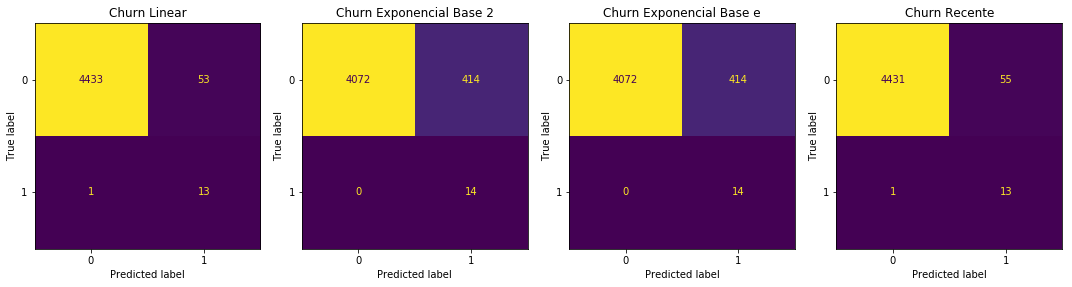

In [10]:
r2, CM = validacaoR2MatrizConfusao(
            real, 
            predict = [linear, exp2, expE, recente], 
            titulos = ["Churn Linear", "Churn Exponencial Base 2", "Churn Exponencial Base e", "Churn Recente"], 
            tamanhos = (15,8)
            )

In [11]:
print("Churn Linear:")
calculaValoresAvaliacao(linear, real)
print("\n\n")
print("Churn Exponencial Base 2:")
calculaValoresAvaliacao(exp2, real)
print("\n\n")
print("Churn Exponencial Base e:")
calculaValoresAvaliacao(expE, real)
print("\n\n")
print("Churn Recente:")
calculaValoresAvaliacao(recente, real)

Churn Linear:
Acurácia: 98.80%

Classe     Precisão     Revocação    F1-Score    
---------------------------------------------
0.0        99.98        98.82        99.39       
1.0        19.70        92.86        32.50       



Churn Exponencial Base 2:
Acurácia: 90.80%

Classe     Precisão     Revocação    F1-Score    
---------------------------------------------
0.0        100.00       90.77        95.16       
1.0        3.27         100.00       6.33        



Churn Exponencial Base e:
Acurácia: 90.80%

Classe     Precisão     Revocação    F1-Score    
---------------------------------------------
0.0        100.00       90.77        95.16       
1.0        3.27         100.00       6.33        



Churn Recente:
Acurácia: 98.76%

Classe     Precisão     Revocação    F1-Score    
---------------------------------------------
0.0        99.98        98.77        99.37       
1.0        19.12        92.86        31.71       
